In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
dataset= pd.read_csv("weatherAUS-noDir.csv")
x_dataset=dataset.drop(["RainTomorrow"],axis=1)
y_dataset= dataset["RainTomorrow"]


In [3]:
#to scale the dataset
#Standardization involves rescaling the features such that 
#they have the properties of a standard normal distribution 
#with a mean of zero and a standard deviation of one

# In the scaled version, the orders of magnitude
#are roughly the same across all the features.
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_dataset)
x_dataset_scaled=scalar.transform(x_dataset)
x_dataset_scaled

array([[ 0.18974136, -0.04600476, -0.20543033, ..., -1.78300058,
         0.71196753, -1.45302404],
       [-0.74878287,  0.26322864, -0.2766202 , ..., -0.18953907,
        -0.47638693, -1.31656519],
       [ 0.11153101,  0.34756502, -0.2766202 , ..., -1.69447494,
        -0.61619334, -1.58948289],
       ...,
       [-1.34318155,  0.29134077, -0.2766202 , ...,  0.78424296,
         0.71196753,  0.04802331],
       [-1.06162428,  0.51623779, -0.2766202 , ...,  0.51866604,
         0.29254831, -0.49781209],
       [-0.68621459,  0.53029385, -0.2766202 , ..., -0.01248779,
         0.0828387 ,  0.04802331]])

In [4]:
#no_of_comp=2
from sklearn.decomposition import PCA

pca=PCA(0.95)
x_pca=pca.fit_transform(x_dataset_scaled)
x_pca.shape

print("No of components created by pca =",pca.n_components_ )

#how much variance is captured by the components
print("Variance is captured by each component : \n", pca.explained_variance_ratio_, "\n")


No of components created by pca = 10
Variance is captured by each component : 
 [0.29779106 0.17314895 0.14883903 0.11429259 0.0565697  0.04957363
 0.03107872 0.02941969 0.02782315 0.02316682] 



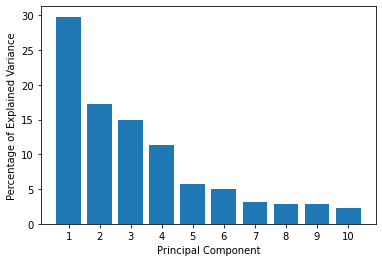

In [5]:
#PCA graphs

#1 A barplot for the variance component by each pca dimension
var_per=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=[str(x) for x in range(1, len(var_per)+1)]
plt.bar(x=range(1,len(var_per)+1), height=var_per, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.show()

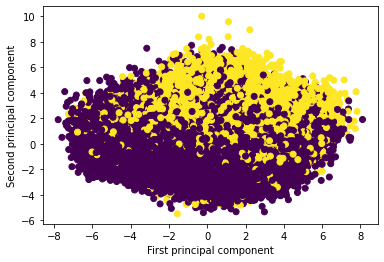

In [6]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_dataset)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

Given that the samples can be separated only using non-linear surfaces, it follows that the prospective machine learning algorithm should be a non linear classifier.
Linear classifiers, such as naive Bayes, would not be suitable since the classes are not linearly separable.


In [14]:
df_after_pca = pd.DataFrame(x_pca, columns = ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
df_after_pca['target'] = y_dataset.tolist()

In [15]:
df_after_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-0.390285,2.602193,-0.287237,-1.930837,-0.327178,-0.162350,-0.068464,0.462757,-1.152815,0.473400,0
1,-0.892532,1.650336,-0.910738,-2.060272,0.223544,-1.111298,-0.022669,0.091255,0.167297,-0.316477,0
2,-1.116415,1.914877,0.265462,-3.073260,-0.154540,-0.231105,0.824747,0.130094,0.014390,0.118205,0
3,-1.721297,-0.986154,-1.124158,-0.493366,0.572129,-1.212039,0.319701,-0.076216,-0.896557,-0.241430,0
4,-1.941764,1.753253,-0.295187,-0.460409,-0.272209,-0.106792,-1.799481,0.570445,-0.404747,0.023462,0
...,...,...,...,...,...,...,...,...,...,...,...
142136,0.554615,-2.333435,-1.553564,0.152574,0.678031,-1.412766,-0.047484,-0.043059,-0.495719,0.033449,0
142137,0.268385,-2.123029,-1.652798,-0.235541,0.859828,-1.326525,0.207316,-0.051534,-0.918417,-0.004339,0
142138,0.095901,-0.977403,-1.969532,-0.579487,1.021841,-0.836952,-0.515952,0.095984,-1.055403,-0.632061,0
142139,-0.408871,-0.380455,-1.875854,-0.646033,0.919493,-0.720361,-0.409720,0.075379,-0.959428,-0.485933,0


In [16]:
# saving the dataframe
df_after_pca.to_csv('data_after_pca.csv')


In [17]:
ds=pd.read_csv('data_after_pca.csv')

In [18]:
ds

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,0,-0.390285,2.602193,-0.287237,-1.930837,-0.327178,-0.162350,-0.068464,0.462757,-1.152815,0.473400,0
1,1,-0.892532,1.650336,-0.910738,-2.060272,0.223544,-1.111298,-0.022669,0.091255,0.167297,-0.316477,0
2,2,-1.116415,1.914877,0.265462,-3.073260,-0.154540,-0.231105,0.824747,0.130094,0.014390,0.118205,0
3,3,-1.721297,-0.986154,-1.124158,-0.493366,0.572129,-1.212039,0.319701,-0.076216,-0.896557,-0.241430,0
4,4,-1.941764,1.753253,-0.295187,-0.460409,-0.272209,-0.106792,-1.799481,0.570445,-0.404747,0.023462,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142136,142136,0.554615,-2.333435,-1.553564,0.152574,0.678031,-1.412766,-0.047484,-0.043059,-0.495719,0.033449,0
142137,142137,0.268385,-2.123029,-1.652798,-0.235541,0.859828,-1.326525,0.207316,-0.051534,-0.918417,-0.004339,0
142138,142138,0.095901,-0.977403,-1.969532,-0.579487,1.021841,-0.836952,-0.515952,0.095984,-1.055403,-0.632061,0
142139,142139,-0.408871,-0.380455,-1.875854,-0.646033,0.919493,-0.720361,-0.409720,0.075379,-0.959428,-0.485933,0
